In [1]:
import pandas as pd
import openpyxl

df = pd.read_excel('result_mod_28June2024.xlsx',index_col=0)
df.head()

,status,title,ap_num,application_date,applicant,representative,final_owner,priority_date,international_filing_date,summary,...,금융,교육,농업,엔터테인먼트,보안,자동화시스템,applicant_sgrp,applicant_lgrp,ongoing,application_year
0,등록,자동화 폐기물 수거함의 딥러닝 기반 인공지능 운영 시스템 및 방법(OPERATION...,1020200078616,2020-06-26,(주)에이씨아이케미칼아시아,고영갑,(주)에이씨아이케미칼아시아,NaN,NaN,"본 발명의 실시 예에 따른 시스템은, 자동화 폐기물 수거함의 딥러닝 기반 인공지능 ...",...,0,0,0,0,0,1,etc,etc,1,2020
1,등록,"인공지능(AI)을 통한 딥러닝훈련모듈과, 순위화프레임워크모듈을 활용하여, 법률전문가...",1020170099431,2017-08-07,강준철,이영규,강소라,NaN,NaN,"본 발명은, 인공지능(AI)에 관한 기술과 온라인 문자열 사전에 관한 기술을 활용하...",...,0,0,0,0,0,0,etc,etc,1,2017
2,공개,인공지능을 이용한 품질검사 시스템 및 방법(System and method for ...,1020220014151,2022-02-03,모던에이아이비전솔루션 주식회사,김정수,NaN,NaN,NaN,"본 발명은 품질검사를 위한 장치 및 방법에 관한 것으로, 본 발명에 따르면, 종래,...",...,0,0,0,0,0,0,etc,etc,1,2022
3,공개,파이썬 딥러닝 기반 인공지능(AI) 부동산 컨설팅 매물장(Python deep le...,1020210106993,2021-08-12,조국환,NaN,NaN,NaN,NaN,본 발명은 광범위하게 활용되는 인터넷기반 부동산 정보를 때와 장소를 불문하고 기록하...,...,0,0,0,0,0,0,etc,etc,1,2021
4,거절,PI 기반 빅데이터 퍼스널 컬러 진단 인공지능 딥러닝 알고리즘 시스템 운영방법(PI...,1020230034713,2023-03-16,주식회사 오콜로르,박상열,NaN,NaN,NaN,본 발명은 PI(Personal Identity) 정보 빅데이터를 구축하는 통하여 ...,...,0,0,0,0,0,0,etc,etc,0,2023


In [2]:
df.international_filing_date = df.international_filing_date.fillna(0)

In [3]:
import matplotlib

matplotlib.rcParams['font.family'] ='Malgun Gothic'

matplotlib.rcParams['axes.unicode_minus'] =False

In [4]:
df_category = df.columns[-5:-15:-1]
applicant_year = df[df.international_filing_date != 0]

In [5]:
# 스타트업 216개 중 특허를 낸 곳은 스트라드비젼 한 곳
# 총 50개 특허를 냈고 그 중 4개가 해외 출원을 함
# 어떤 특허를 많이 냈고, 그중 어떤 특허들이 해외출원을 했는지
# 몇년도에 출원을 많이 했는지

applicant_year.applicant_sgrp[applicant_year.applicant_sgrp == '스트라드비젼']

4241     스트라드비젼
10833    스트라드비젼
25058    스트라드비젼
67007    스트라드비젼
Name: applicant_sgrp, dtype: object

In [27]:
len(df[df.applicant_sgrp == '스트라드비젼'])

50

In [25]:
want_grouped = df[df.applicant_sgrp == '스트라드비젼']

In [26]:
di = {}
for i in df_category:
    di[i] = int(want_grouped[i].sum())
print(di)

{'자동화시스템': 0, '보안': 3, '엔터테인먼트': 0, '농업': 0, '교육': 0, '금융': 0, '자동차': 28, '전자상거래서비스': 0, '의료': 0, '제너럴': 42}


In [50]:
applicant_year1 = applicant_year[applicant_year.applicant_sgrp == '스트라드비젼']

{'자동화시스템': 0, '보안': 0, '엔터테인먼트': 0, '농업': 0, '교육': 0, '금융': 0, '자동차': 2, '전자상거래서비스': 0, '의료': 0, '제너럴': 3}
{'자동차': 2, '제너럴': 3}


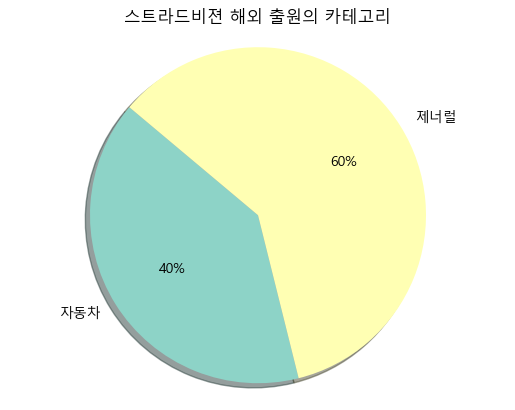

In [57]:
di1 = {}
for i in df_category:
   di1[i] = int(applicant_year1[i].sum())
print(di1)

fi1 = {key:value for key, value in di1.items() if value !=0}
print(fi1)
cate = fi1.keys()
val = fi1.values()
plt.pie(val,labels=cate,colors=sns.color_palette('Set3'),shadow=True,startangle=140,autopct='%d%%')
plt.title('스트라드비젼 해외 출원의 카테고리')
plt.axis('equal')
plt.show()

{'보안': 3, '자동차': 28, '제너럴': 42}


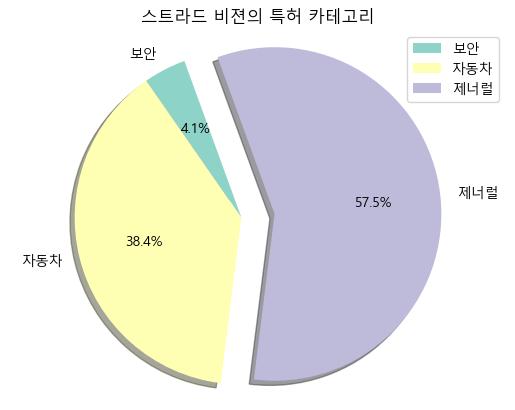

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

filter = {key:value for key, value in di.items() if value != 0}
print(filter)
explode = [0,0,0.2]
category = filter.keys()
value = filter.values()
plt.pie(value,labels=category,colors= sns.color_palette('Set3'),shadow=True,startangle=110,explode=explode,autopct='%1.1f%%')
plt.legend(category, loc ='best')
plt.title("스트라드 비젼의 특허 카테고리")
plt.axis('equal')
plt.show()

In [61]:
# 몇년도의 출원을 많이 했는지

want_grouped.application_year.value_counts()

application_year
2019    30
2020    13
2021     3
2022     2
2018     2
Name: count, dtype: int64

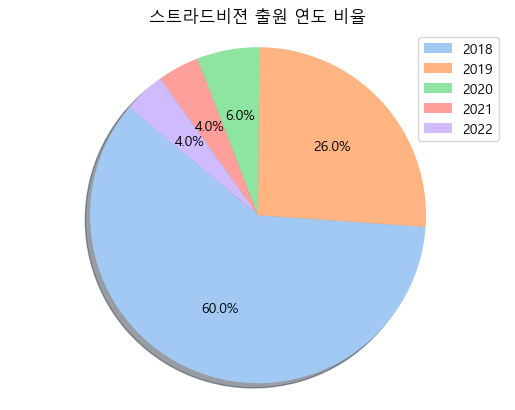

In [78]:
plt.pie(want_grouped.application_year.value_counts(),autopct='%1.1f%%',colors=sns.color_palette('pastel'),shadow=True,startangle=140)
plt.legend(want_grouped.application_year.value_counts().sort_index().index)
plt.title('스트라드비젼 출원 연도 비율')
plt.axis('equal')
plt.show()

In [79]:
want_grouped.columns

Index(['status', 'title', 'ap_num', 'application_date', 'applicant',
       'representative', 'final_owner', 'priority_date',
       'international_filing_date', 'summary', '제너럴', '의료', '전자상거래서비스', '자동차',
       '금융', '교육', '농업', '엔터테인먼트', '보안', '자동화시스템', 'applicant_sgrp',
       'applicant_lgrp', 'ongoing', 'application_year'],
      dtype='object')

In [ ]:
want_grouped

C:\Users\com\AppData\Local\Temp\ipykernel_3208\1089781048.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = want_grouped, x='application_year',palette=sns.color_palette('colorblind'))
C:\Users\com\AppData\Local\Temp\ipykernel_3208\1089781048.py:1: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.countplot(data = want_grouped, x='application_year',palette=sns.color_palette('colorblind'))


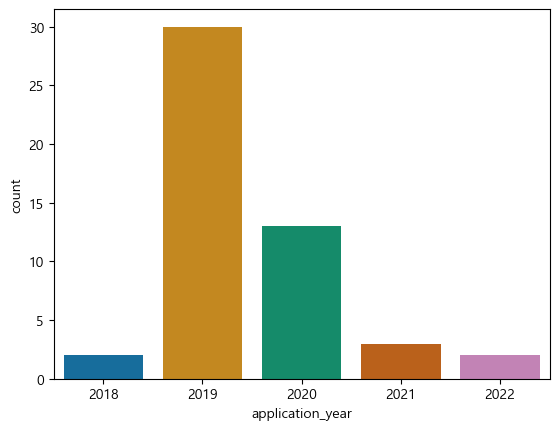

In [77]:
sns.countplot(data = want_grouped, x='application_year',palette=sns.color_palette('colorblind'))
plt.show()

In [ ]:
# 특허를 삼성 엘지 현대 순으로 많이 냈는데 각 카테고리별말고
# 연도별 어떤 카테고리가 많은지 countplot => 카테고리가 많아서 한눈에 안보일 듯....
# 가능하면 카테고리 탑 5개만은 못할 것 같기도....


In [93]:
# 기타와 해외 출원인을 제거하고 그 중에선 어떤 카테고리가 해외출원이 많이 되었는지

group = applicant_year[~applicant_year['applicant_lgrp'].isin(['etc', '해외출원인'])]


C:\Users\com\AppData\Local\Temp\ipykernel_3208\369691915.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=group,x='applicant_lgrp',palette=sns.color_palette('deep6'))
C:\Users\com\AppData\Local\Temp\ipykernel_3208\369691915.py:1: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.countplot(data=group,x='applicant_lgrp',palette=sns.color_palette('deep6'))


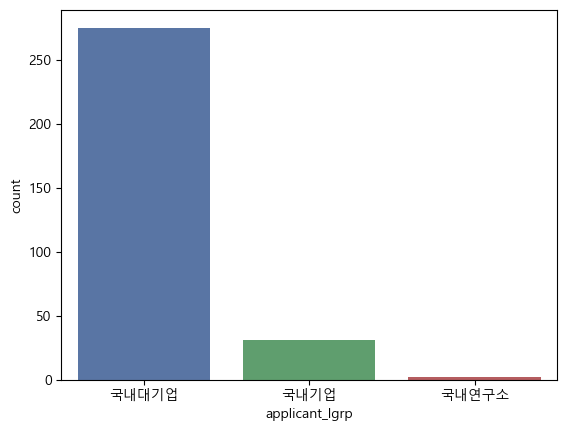

In [94]:
sns.countplot(data=group,x='applicant_lgrp',palette=sns.color_palette('deep6'))
plt.show()

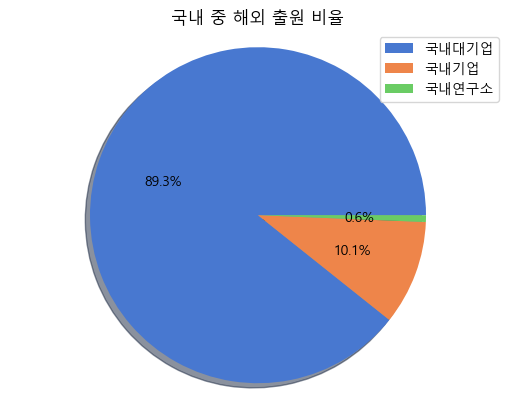

In [96]:
plt.pie(group.applicant_lgrp.value_counts(),shadow=True, autopct='%1.1f%%',colors=sns.color_palette('muted'))
plt.legend(group.applicant_lgrp.value_counts().index,loc='best')
plt.axis('equal')
plt.title('국내 중 해외 출원 비율')
plt.show()

In [100]:
dic = {}
for i in df_category:
    dic[i] = int(group[i].sum())
print(dic)

{'자동화시스템': 4, '보안': 7, '엔터테인먼트': 11, '농업': 0, '교육': 1, '금융': 1, '자동차': 30, '전자상거래서비스': 13, '의료': 4, '제너럴': 120}


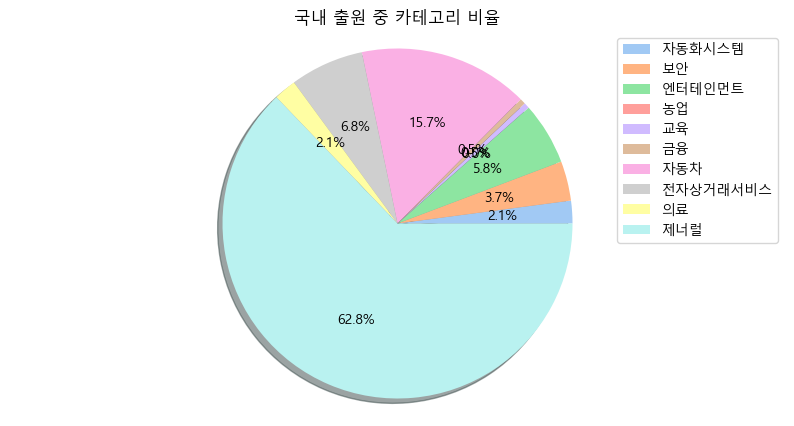

In [107]:
label = dic.keys()
value = dic.values()

plt.figure(figsize=(10,5))
plt.pie(value,autopct='%1.1f%%',shadow=True,colors=sns.color_palette('pastel'))
plt.legend(label,loc='upper right')
plt.title('국내 출원 중 카테고리 비율')
plt.axis('equal')
plt.show()

In [119]:

# 밸류 값을 기준으로 정렬
sorted_dict = sorted(dic.items(), key=lambda x: x[1],reverse=True)

sorted_dict = dict(sorted_dict[:5])


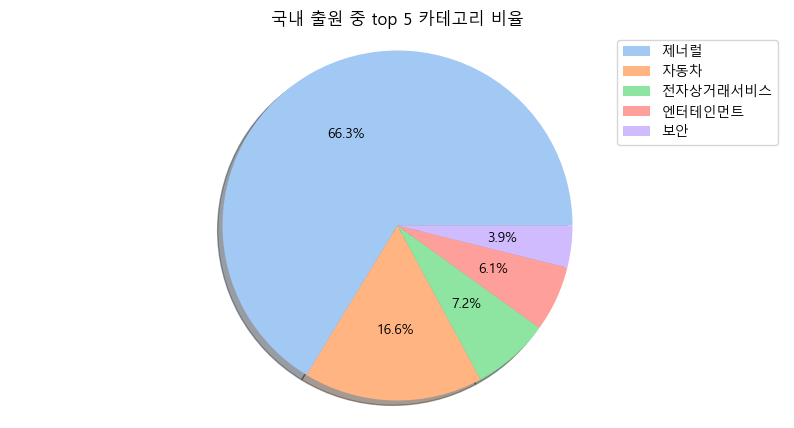

In [121]:
label = sorted_dict.keys()
value = sorted_dict.values()

plt.figure(figsize=(10,5))
plt.pie(value,autopct='%1.1f%%',shadow=True,colors=sns.color_palette('pastel'))
plt.legend(label,loc='upper right')
plt.title('국내 출원 중 top 5 카테고리 비율')
plt.axis('equal')
plt.show()

In [ ]:
# 크롤링
# 화장품 제품 - 스킨케어 순위 : 올리브영, 네이버쇼핑

In [123]:
import requests
from bs4 import BeautifulSoup

url ='https://www.oliveyoung.co.kr/store/display/getCategoryShop.do?dispCatNo=10000010001&gateCd=Drawer&t_page=%EB%93%9C%EB%A1%9C%EC%9A%B0_%EC%B9%B4%ED%85%8C%EA%B3%A0%EB%A6%AC&t_click=%EC%B9%B4%ED%85%8C%EA%B3%A0%EB%A6%AC%ED%83%AD_%EB%8C%80%EC%B9%B4%ED%85%8C%EA%B3%A0%EB%A6%AC&t_1st_category_type=%EB%8C%80_%EC%8A%A4%ED%82%A8%EC%BC%80%EC%96%B4'

res = requests.get(url)
soup = BeautifulSoup(res.text,'html.parser')

all_title = soup.select('.tx_name')

for all in all_title:
    print(all.text)

all_price = soup.select('.tx_num')
for a in all_price:
    print(a.text)

[굿즈증정/1+1]닥터지 레드 블레미쉬 클리어 수딩 크림 70ml 1+1 기획
[한정기획] 구달 청귤 비타C 잡티케어 세럼 30ml+31ml 리필 기획
[단독/더블기획] 웰라쥬 리얼 히알루로닉 블루 100 앰플 75ml 1+1 기획
[아랑Pick] VT 리들샷 100 에센스 50ml 기획/단품
토리든 다이브인 저분자 히알루론산 수딩크림 더블기획 (100ml+100ml)
[3년연속어워즈] 아누아 어성초 77 수딩 토너 350ml 리필 기획세트(350ml+350ml리필)
라로슈포제 시카플라스트 밤B5+ 100ml 기획 (+시카크림 15ml 증정)
[6월 올영픽] 라운드랩 소나무 진정 시카 앰플 30ml 더블기획 (+크림 50ml)
[1+1+1한정기획/모공탄력] 성분에디터 그린토마토 모공앰플 30ml 1+1+1 트리플기획
[후니언 PICK/1+1] 에스네이처 아쿠아 스쿠알란 수분크림 60ml 더블 기획 (+카밍패드 2매)
VT 리들샷 300 에센스 50ml
[김지영PICK/한정기획] 아이소이 BR 블레미쉬 케어 업 세럼30ml 1+1 기획(30ml+30ml)
[대용량] 파티온 노스카나인 트러블 세럼 단독 기획 (50ml+15ml)
[호시PICK/6월 올영픽] 달바 화이트 트러플 퍼스트 스프레이 세럼 100ml + 100ml 기획세트
[6월 올영픽/아일릿 원희PICK]바이오더마 하이드라비오 에센스로션 200ml 더블 기획
에스트라 아토베리어365 크림 80ml 기획 (+하이드로에센스 25ml+리제덤세럼 7ml)
[화해1위/수분쿨링진정] 에스네이처 아쿠아 오아시스 수분 젤크림 90ml 기획 (+카밍패드 2매)
[피부결] 넘버즈인 3번 보들보들 결 세럼 80ml 기획(+3번 결 세럼팩)
[트러블촉이올때] 브링그린 징크테카 트러블 세럼 한정기획
[1+1+증정]닥터지 레드 블레미쉬 바쿠치올 포어젯 세럼 30ml 리필 기획 (+크림 10ml)
38,000
28,800
28,000
20,160
46,000
29,900
32,000
24,600
42,000
27,930
49,00

In [134]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.oliveyoung.co.kr/store/main/getBestList.do?dispCatNo=900000100100001&fltDispCatNo=10000010001&pageIdx=1&rowsPerPage=8&t_page=%EC%B9%B4%ED%85%8C%EA%B3%A0%EB%A6%AC%EA%B4%80&t_click=%EB%9E%AD%ED%82%B9BEST%EC%83%81%ED%92%88%EB%B8%8C%EB%9E%9C%EB%93%9C_%EC%9D%B8%EA%B8%B0%EC%83%81%ED%92%88%EB%8D%94%EB%B3%B4%EA%B8%B0'

res = requests.get(url)
soup = BeautifulSoup(res.text,'html.parser')

# rank = []
# all_rank = soup.select('.thumb_flag')
# for r in all_rank:
#     rank.append(r.text)


# rank = []
# all_rank = soup.select('.newOyflag ')
# for r in all_rank:
#     rank.append(r.text)
# print(rank)

rank = [i for i in range(1,101)]
title = []
all_title = soup.select('.tx_name')
for t in all_title:
    title.append(t.text)

brand=[]
all_brand = soup.select('.tx_brand')
for b in all_brand:
    brand.append(b.text)

price = []
all_price = soup.select('.tx_cur .tx_num')
for p in all_price:
    price.append(p.text)

print(len(rank),len(title),len(brand),len(price))
data = pd.DataFrame({'Rank':rank, 
                     'Brand':brand,
                     'Title':title,
                     'Price':price})
data

100 100 100 100


,Rank,Brand,Title,Price
0,1,닥터지,[굿즈증정/1+1]닥터지 레드 블레미쉬 클리어 수딩 크림 70ml 1+1 기획,"28,800"
1,2,VT,[아랑Pick] VT 리들샷 100 에센스 50ml 기획/단품,"24,600"
2,3,웰라쥬,[단독/더블기획] 웰라쥬 리얼 히알루로닉 블루 100 앰플 75ml 1+1 기획,"29,900"
3,4,라운드랩,[6월 올영픽] 라운드랩 소나무 진정 시카 앰플 30ml 더블기획 (+크림 50ml),"28,000"
4,5,구달,[한정기획] 구달 청귤 비타C 잡티케어 세럼 30ml+31ml 리필 기획,"20,160"
...,...,...,...,...
95,96,CKD,[한혜진PICK]CKD 레티노콜라겐 저분자 300 괄사 목주름 크림 50ml 1+1 기획,"33,700"
96,97,바이오힐보,[3D볼륨탄력크림] 바이오힐보 프로바이오덤 3D 리프팅크림 50ml 리필기획,"39,900"
97,98,에스네이처,[소윤PICK/화해1위] 에스네이처 아쿠아 오아시스 토너 300ml 기획(+ 수분크...,"18,900"
98,99,토리든,[대용량기획] 토리든 다이브인 저분자 히알루론산 세럼 70ml 대용량 기획(+세럼 ...,"24,000"


In [136]:
data.Brand.value_counts().head(10)

Brand
토리든      8
라운드랩     7
닥터지      5
에스네이처    5
브링그린     5
에스트라     5
구달       3
피지오겔     3
이니스프리    3
넘버즈인     3
Name: count, dtype: int64

In [150]:
data.Brand.unique()

array(['닥터지', 'VT', '웰라쥬', '라운드랩', '구달', '토리든', '아이소이', '성분에디터', '브링그린',
       '파티온', '이니스프리', '셀리맥스', '에스네이처', '아이디얼포맨', '피지오겔', '아비브', '퍼셀',
       '에스트라', '넘버즈인', '달바', '쏘내추럴', '아이오페', '메이크프렘', '아누아', '아벤느',
       '이즈앤트리', '디마르3', '우르오스', '닥터자르트', '한율', '바이오힐보', '차앤박', '온그리디언츠',
       '이지듀', '메디큐브', '리얼베리어', '더랩바이블랑두', '라로슈포제', '바이오더마', 'AHC', '셀라딕스',
       '센텔리안24', '에센허브', '디오디너리', '라네즈', '비욘드', 'CKD'], dtype=object)

In [138]:
import re

def extract_ml(value):
    match = re.search(r'(\d+)ml', value)
    return int(match.group(1)) if match else 0

# 새로운 열 'ml' 생성 및 값 추출
data['ML'] = data['Title'].apply(extract_ml)

In [149]:
data.ML.value_counts().head(10)

ML
50     17
30     17
0       8
200     7
100     6
150     5
300     5
60      4
20      3
70      3
Name: count, dtype: int64

In [141]:
data[data.ML == 0]

,Rank,Brand,Title,Price,ML
9,10,브링그린,브링그린 티트리시카수딩크림플러스 더블한정기획(+토너250)(배스킨콜라보),"19,800",0
10,11,브링그린,[트러블촉이올때] 브링그린 징크테카 트러블 세럼 한정기획,"21,240",0
14,15,브링그린,[대용량][한정기획] 브링그린 티트리시카수딩토너 500mL+200리필(배스킨콜라보),"20,340",0
19,20,아이디얼포맨,아이디얼 포 맨 프레시 올인원 젤 로션 1+1 한정기획,"20,160",0
40,41,우르오스,우르오스 올인원 단품/기획 2종 택 1,"29,700",0
63,64,토리든,[NEW/티벳동생PICK] 토리든 다이브인 포맨 저분자 히알루론산 올인원 200g,"15,960",0
73,74,셀라딕스,셀라딕스 세범 리밸런싱 RX 131 앰플,"25,400",0
85,86,브링그린,[NEW] 브링그린 대나무히알루수분크림100mL더블기획,"18,800",0


In [146]:
def extract_text(value):
    match = re.search(r'(\s[가-힣\s]+)\d+ml', value)
    return match.group(1).strip() if match else 0

# 새로운 열 'text' 생성 및 값 추출
data['Type'] = data['Title'].apply(extract_text)

In [148]:
data.Type.value_counts()

Type
0                        22
에센스                       3
토리든 다이브인 저분자 히알루론산 세럼     3
잡티케어 세럼                   2
크림                        2
                         ..
라네즈 크림스킨                  1
괄사 목주름 크림                 1
리프팅크림                     1
에스네이처 아쿠아 오아시스 토너         1
아이소이 장수진 수분크림             1
Name: count, Length: 71, dtype: int64

In [144]:
data[data.Type == 0]

,Rank,Brand,Title,Price,ML,Type
5,6,토리든,토리든 다이브인 저분자 히알루론산 수딩크림 더블기획 (100ml+100ml),"27,930",100,0
9,10,브링그린,브링그린 티트리시카수딩크림플러스 더블한정기획(+토너250)(배스킨콜라보),"19,800",0,0
10,11,브링그린,[트러블촉이올때] 브링그린 징크테카 트러블 세럼 한정기획,"21,240",0,0
13,14,파티온,[대용량] 파티온 노스카나인 트러블 세럼 단독 기획 (50ml+15ml),"38,000",50,0
14,15,브링그린,[대용량][한정기획] 브링그린 티트리시카수딩토너 500mL+200리필(배스킨콜라보),"20,340",0,0
19,20,아이디얼포맨,아이디얼 포 맨 프레시 올인원 젤 로션 1+1 한정기획,"20,160",0,0
21,22,아비브,[7월 올영픽/촘촘수분] 아비브 어성초 카밍 토너 스킨부스터 더블 기획 (200ml...,"27,300",200,0
40,41,우르오스,우르오스 올인원 단품/기획 2종 택 1,"29,700",0,0
51,52,구달,[리필기획] 구달 청귤 비타C 잡티케어 크림 리필에디션 기획(75ml+75ml리필),"22,800",75,0
54,55,브링그린,[화잘먹크림] 브링그린 티트리시카수딩크림플러스 100mL+100ml 더블기획,"19,800",100,0


In [161]:
data

,Rank,Brand,Title,Price,ML,Type
0,1,닥터지,[굿즈증정/1+1]닥터지 레드 블레미쉬 클리어 수딩 크림 70ml 1+1 기획,28800,70,레드 블레미쉬 클리어 수딩 크림
1,2,VT,[아랑Pick] VT 리들샷 100 에센스 50ml 기획/단품,24600,50,에센스
2,3,웰라쥬,[단독/더블기획] 웰라쥬 리얼 히알루로닉 블루 100 앰플 75ml 1+1 기획,29900,75,앰플
3,4,라운드랩,[6월 올영픽] 라운드랩 소나무 진정 시카 앰플 30ml 더블기획 (+크림 50ml),28000,30,라운드랩 소나무 진정 시카 앰플
4,5,구달,[한정기획] 구달 청귤 비타C 잡티케어 세럼 30ml+31ml 리필 기획,20160,30,잡티케어 세럼
...,...,...,...,...,...,...
95,96,CKD,[한혜진PICK]CKD 레티노콜라겐 저분자 300 괄사 목주름 크림 50ml 1+1 기획,33700,50,괄사 목주름 크림
96,97,바이오힐보,[3D볼륨탄력크림] 바이오힐보 프로바이오덤 3D 리프팅크림 50ml 리필기획,39900,50,리프팅크림
97,98,에스네이처,[소윤PICK/화해1위] 에스네이처 아쿠아 오아시스 토너 300ml 기획(+ 수분크...,18900,300,에스네이처 아쿠아 오아시스 토너
98,99,토리든,[대용량기획] 토리든 다이브인 저분자 히알루론산 세럼 70ml 대용량 기획(+세럼 ...,24000,70,토리든 다이브인 저분자 히알루론산 세럼


In [168]:
# data['Price'] = data['Price'].str.replace(',','').astype(int)
print(data.Price)
data['1ML'] =  round(data['Price'] /data['ML'])


0     28800
1     24600
2     29900
3     28000
4     20160
      ...  
95    33700
96    39900
97    18900
98    24000
99    23940
Name: Price, Length: 100, dtype: int64


In [176]:
data['1ML'].sort_values(ascending=False).head(20)

14       inf
19       inf
9        inf
10       inf
73       inf
85       inf
63       inf
40       inf
59    3250.0
23    1975.0
83    1975.0
75    1740.0
86    1584.0
49    1425.0
30    1417.0
24    1350.0
56    1330.0
77    1330.0
6     1330.0
67     997.0
Name: 1ML, dtype: float64